In [63]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [64]:
#reading data set
data_set = pd.read_csv("insurance.csv")

data_set.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
print(data_set.shape)
data_set.describe().transpose()

(1338, 7)


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [66]:
data_set.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [67]:
data_set.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [68]:
dupes = data_set.duplicated()
print(sum(dupes))
#having one duplicate
data_set = data_set.drop_duplicates()
dupes = data_set.duplicated()
print(sum(dupes))

1
0


now data is perfect no duplicates

# EDA and VISUALIZATION

<AxesSubplot:xlabel='charges', ylabel='Density'>

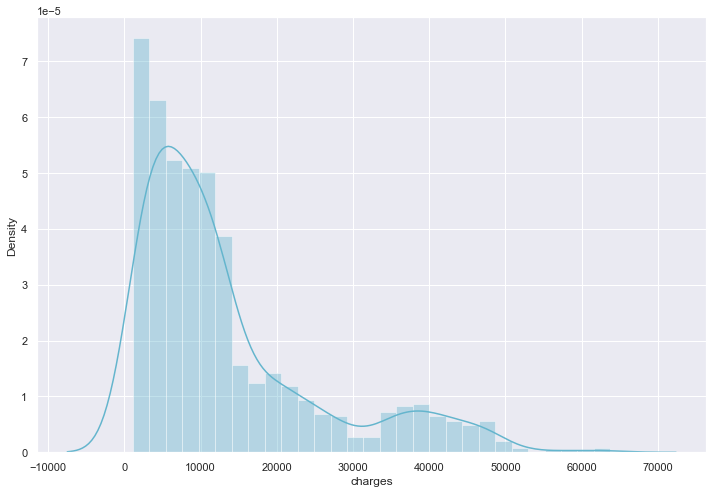

In [69]:
# EDA and VISUVALIZATIONS 
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(data_set["charges"],kde=True, color='c')

this distribution is right-skewed. To make it closer to normal we can apply natural log

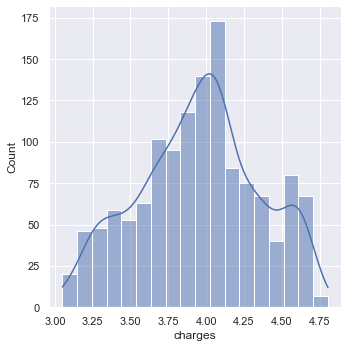

In [70]:
#distplot
sns.set(rc={'figure.figsize':(12,8)})
sns.displot(np.log10(data_set['charges']),kde=True)

<AxesSubplot:xlabel='charges', ylabel='region'>

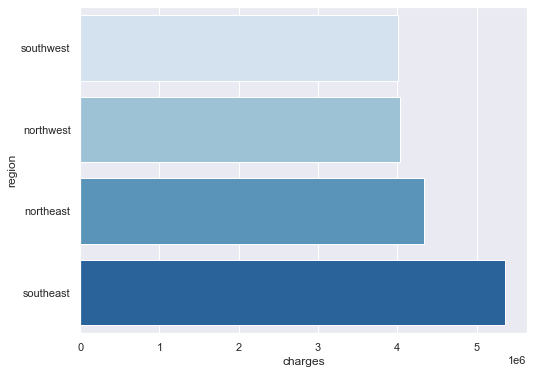

In [71]:
charges = data_set['charges'].groupby(data_set.region).sum().sort_values(ascending =True)
plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(charges.head(), charges.head().index, palette='Blues')

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

<AxesSubplot:xlabel='region', ylabel='charges'>

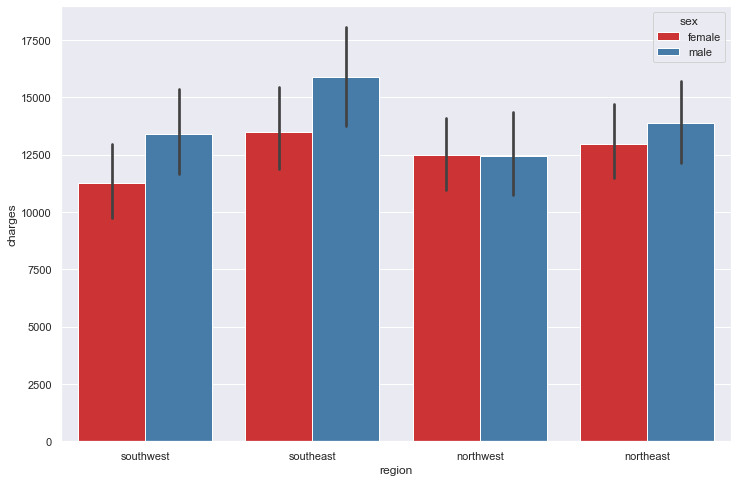

In [72]:
sns.barplot(x='region',y='charges',hue='sex',data = data_set,palette='Set1')

<AxesSubplot:xlabel='region', ylabel='charges'>

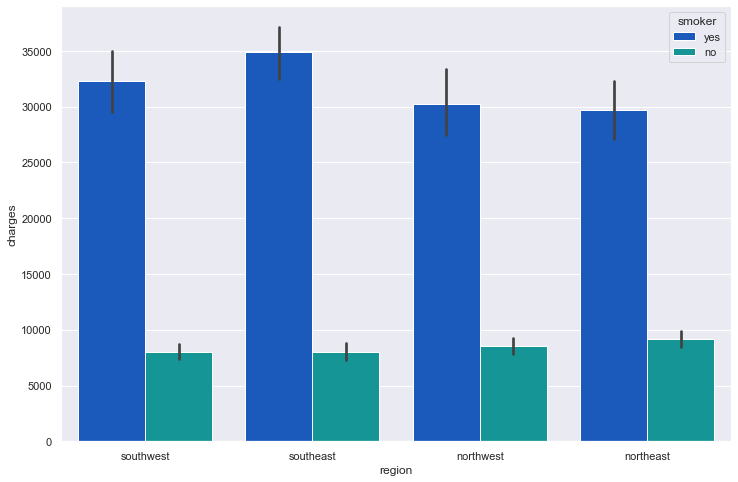

In [73]:
sns.barplot(x='region',y='charges',data=data_set,hue='smoker',palette='winter')

<AxesSubplot:xlabel='region', ylabel='charges'>

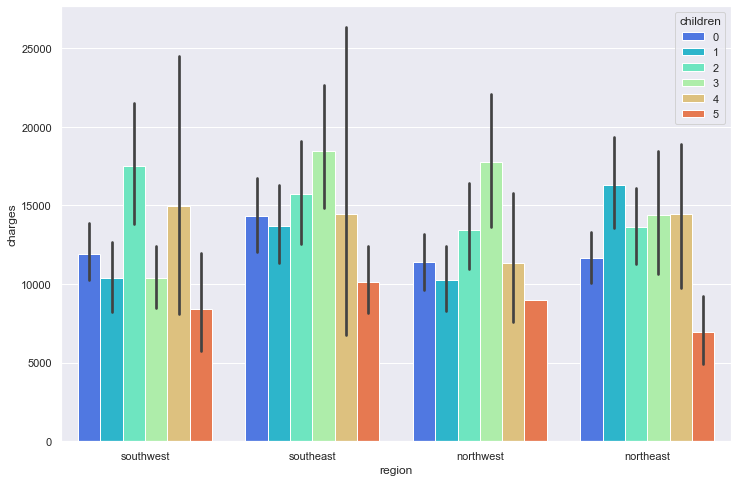

In [74]:
sns.barplot(x='region',y='charges',data=data_set,hue='children',palette='rainbow')

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

Now let's analyze the medical charges by age, bmi and children according to the smoking factor

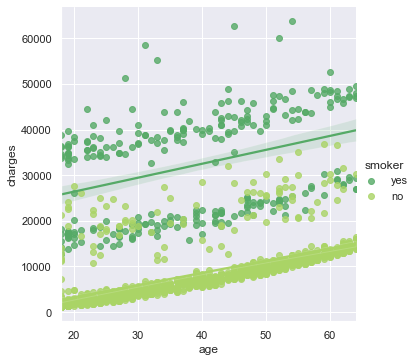

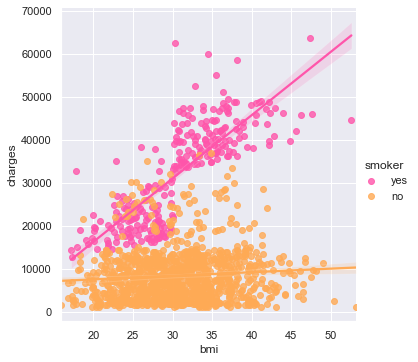

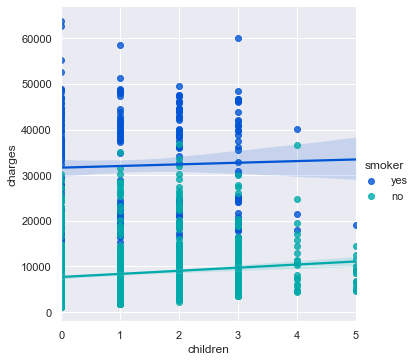

In [75]:
sns.lmplot(x='age',y='charges',data=data_set,hue='smoker',palette='summer')
sns.lmplot(x='bmi',y='charges',data=data_set,hue='smoker',palette='spring')
sns.lmplot(x='children',y='charges',data=data_set,hue='smoker',palette='winter')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

<AxesSubplot:xlabel='children', ylabel='charges'>

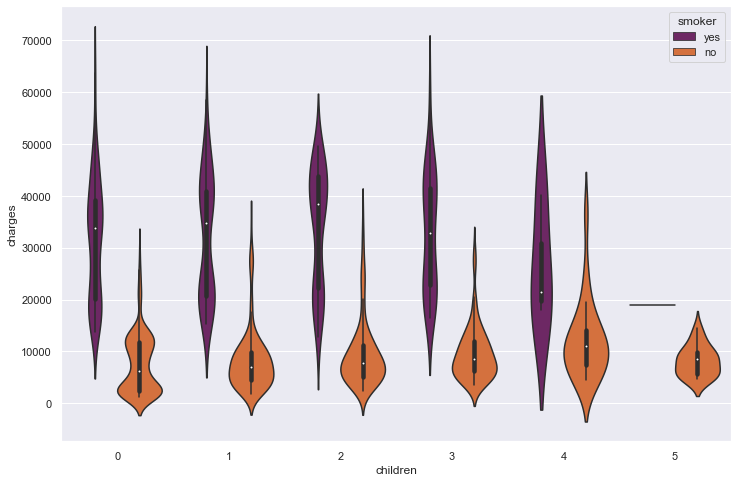

In [76]:
sns.violinplot(x = 'children', y = 'charges', data=data_set,
                 orient='v', hue='smoker', palette='inferno')

In [77]:
data_set.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## ENCODING(one hot and label encoding)

In [78]:
#encoding one hot encoding
data_set = pd.get_dummies(data=data_set,columns=["sex"])
#data_set = pd.get_dummies(data=data_set,columns=["smoker"])
#data_set = pd.get_dummies(data=data_set,columns=["region"])


In [79]:
#data_set['sex'] =  data_set['sex'].apply({'male':1,'female':0}.get)
data_set['smoker'] =  data_set['smoker'].apply({'yes':1, 'no':0}.get)
data_set['region'] =  data_set['region'].apply({'southwest':4, 'southeast':1, 'northwest':3, 'northeast':2}.get)


In [80]:
df=data_set

In [81]:
data_set.head()

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,1,4,16884.92400,1,0
1,18,33.770,1,0,1,1725.55230,0,1
2,28,33.000,3,0,1,4449.46200,0,1
3,33,22.705,0,0,3,21984.47061,0,1
4,32,28.880,0,0,3,3866.85520,0,1


In [82]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1337 non-null   int64  
 1   bmi         1337 non-null   float64
 2   children    1337 non-null   int64  
 3   smoker      1337 non-null   int64  
 4   region      1337 non-null   int64  
 5   charges     1337 non-null   float64
 6   sex_female  1337 non-null   uint8  
 7   sex_male    1337 non-null   uint8  
dtypes: float64(2), int64(4), uint8(2)
memory usage: 108.0 KB


<AxesSubplot:>

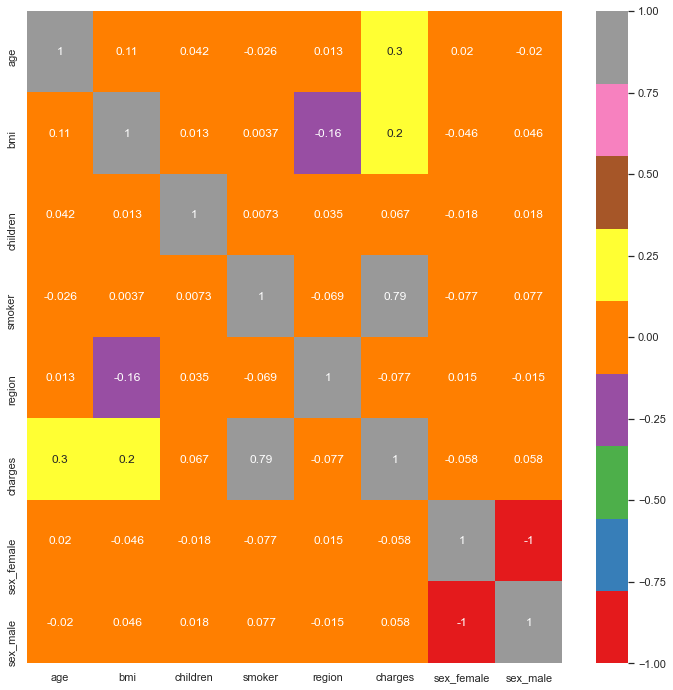

In [83]:
plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(data_set.corr(), annot=True,cmap='Set1')

# Random forest regressor[RFR]

In [84]:
X = data_set.drop("charges",axis=1)
y= data_set["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
rfr = RandomForestRegressor(n_estimators=100,random_state=1,criterion='mse',n_jobs=-1)
rfr.fit(X_train,y_train)

# Model Evaluation
#here R2 score is nothing but our model score/acuracy
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The rfr model performance for training set:")
print("\n")
print("MSE is ",mean_squared_error(y_train, y_train_pred))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set


rmse_rfr = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
score_rfr= r2_score(y_test, y_test_pred)

print("The rfr model performance for testing set:")
print("\n")
print("MSE is ",mean_squared_error(y_test, y_test_pred))
print('RMSE is {}'.format(rmse_rfr))
print('R2 score is {}'.format(score_rfr))   

The rfr model performance for training set:


MSE is  3359951.5220146743
RMSE is 1833.0170544800378
R2 score is 0.9761579376069384


The rfr model performance for testing set:


MSE is  27096413.362268277
RMSE is 5205.421535502027
R2 score is 0.8389319199345683


## Extracting important features

In [85]:
X_train.columns

Index(['age', 'bmi', 'children', 'smoker', 'region', 'sex_female', 'sex_male'], dtype='object')

smoker        0.629024
bmi           0.206971
age           0.127584
children      0.016848
region        0.013180
sex_male      0.003390
sex_female    0.003003
dtype: float64


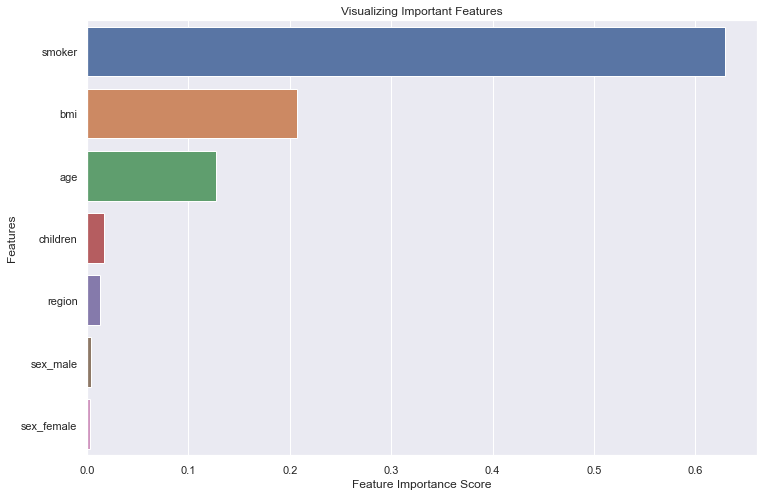

In [86]:
#Extracting important features
feature_imp = pd.Series(rfr.feature_importances_,index= X_train.columns).sort_values(ascending=False)
print(feature_imp)

# Visualizing our Random forest regressor
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Hyper parameter tuning
### using RandomizedSearchCV

In [87]:
parameters = {
    'n_estimators':[50,100,200,300,400,500,600,800,1000],
    'criterion':['mse','mae'],
    'max_depth':[5,10,20,30,40,50],
    'min_samples_split':[2,5,10,20],
    'min_samples_leaf':[1,2,5,10],
    'max_features':['auto','sprt','log2']}
random_CV = RandomizedSearchCV(estimator=rfr,
   param_distributions=parameters,
    n_iter=10,                          
    n_jobs=1,
    cv=5)
random_CV.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=1),
                   n_jobs=1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [5, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sprt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500, 600, 800, 1000]})

In [88]:
random_CV.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=30, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=200, n_jobs=-1,
                      random_state=1)

In [89]:
random_CV.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'mae'}

In [90]:
random_CV.best_score_

0.8566488300983798

In [91]:
rfr=RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                    n_estimators=50,random_state=1,criterion='mse',max_features='auto')

rfr.fit(X_train,y_train)


#here R2 score is nothing but our model score/acuracy
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The rfr model performance for training set:")
print("\n")
print("MSE is ",mean_squared_error(y_train, y_train_pred))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set


rmse_rfr_hp = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
score_rfr_hp = r2_score(y_test, y_test_pred)

print("The model performance for testing set:")
print("\n")
print("MSE is ",mean_squared_error(y_test, y_test_pred))
print('RMSE is {}'.format(rmse_rfr_hp))
print('R2 score is {}'.format(score_rfr_hp)) 

The rfr model performance for training set:


MSE is  12867593.51125116
RMSE is 3587.1428060855287
R2 score is 0.9086921447128946


The model performance for testing set:


MSE is  25078124.61352608
RMSE is 5007.8063674153855
R2 score is 0.8509291495837972


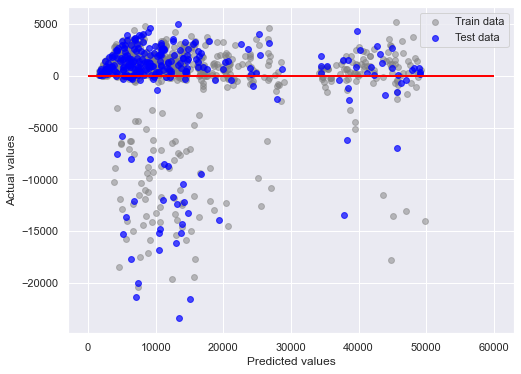

In [92]:
plt.figure(figsize=(8,6))

plt.scatter(y_train_pred, y_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred, y_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red') 

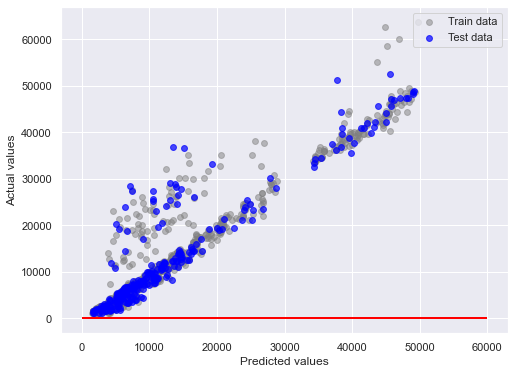

In [93]:
plt.figure(figsize=(8,6))

plt.scatter(y_train_pred,y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred, y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

# RFR with PCA

In [94]:
# Naming the features
features =  data_set.drop("charges",axis=1)

# Separating out the features
x =  features.values

# Separating out the target
y = data_set["charges"].values

# Standardizing the features
x= StandardScaler().fit_transform(x)

<AxesSubplot:xlabel='PCA count', ylabel='% variance explained'>

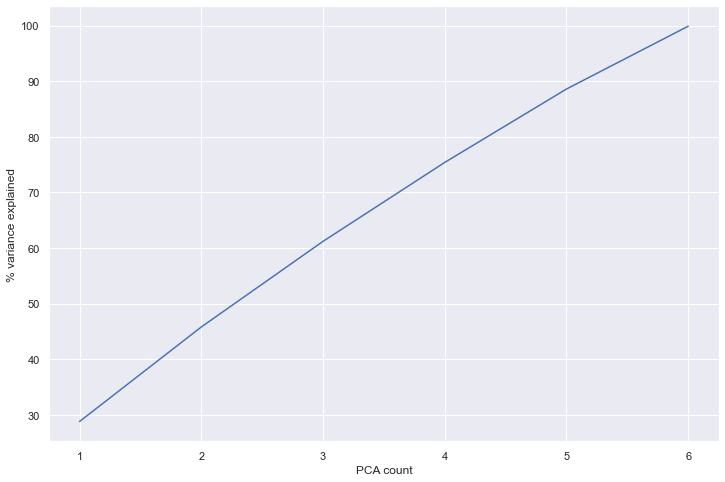

In [95]:
# Determining principal components
pca = PCA(n_components=6)
x= pca.fit_transform(x)
principalDf = pd.DataFrame(data =x
             , columns = ["principal_component1","principal_component2","principal_component3","principal_component4","principal_component5","principal_component6"])

principal_components = np.arange(1,len(pca.explained_variance_ratio_)+1)
variance_explained = np.cumsum(np.around(pca.explained_variance_ratio_*100,decimals=1))

sns.lineplot(x='PCA count',y='% variance explained',
             data=pd.DataFrame({ 'PCA count': principal_components,
                 '% variance explained':variance_explained}))

In [96]:
# Final DF
finalDf = pd.concat([principalDf,data_set[["charges"]]], axis = 1)
finalDf.head()

,principal_component1,principal_component2,principal_component3,principal_component4,principal_component5,principal_component6,charges
0,-1.272107,-1.262782,-1.766643,0.962513,1.147052,1.520959,16884.92400
1,1.446661,0.425013,-1.142423,-0.469720,-1.620870,-0.045471,1725.55230
2,1.462056,0.594533,0.117095,0.676918,-1.984366,-0.509438,4449.46200
3,1.212904,-1.538994,-0.417025,-0.919203,0.219024,-0.519905,21984.47061
4,1.283483,-0.861609,-0.328941,-1.044818,0.029302,0.192177,3866.85520


In [97]:
pca.explained_variance_ratio_

array([0.28834829, 0.17017641, 0.1542539 , 0.14244448, 0.13189846,
       0.11287846])

<AxesSubplot:xlabel='principal_component1', ylabel='charges'>

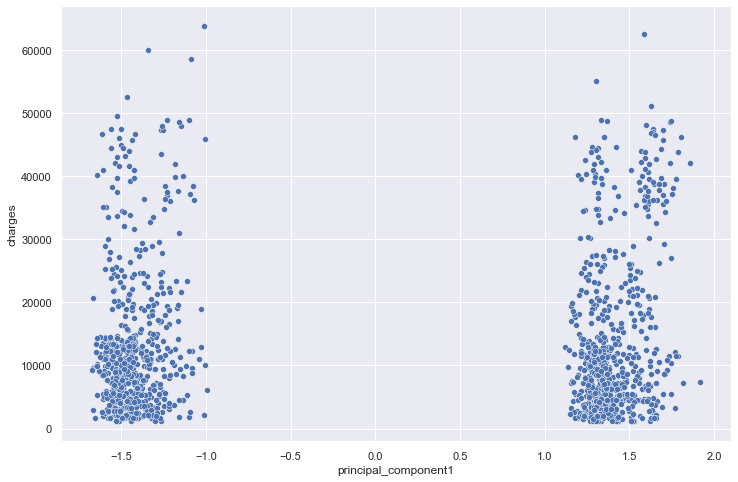

In [98]:
sns.scatterplot(x='principal_component1',y='charges',data=finalDf)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
rfr=RandomForestRegressor(n_estimators=100,random_state=1)
rfr.fit(X_train,y_train)

#here R2 score is nothing but our model score/acuracy
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The rfr model performance for training set:")
print("\n")
print("MSE is ",mean_squared_error(y_train, y_train_pred))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set


rmse_rfr_pca = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
score_rfr_pca = r2_score(y_test, y_test_pred)

print("The model performance for testing set:")
print("\n")
print("MSE is ",mean_squared_error(y_test, y_test_pred))
print('RMSE is {}'.format(rmse_rfr_pca))
print('R2 score is {}'.format(score_rfr_pca)) 

The rfr model performance for training set:


MSE is  3978114.892787614
RMSE is 1994.5212189364179
R2 score is 0.9717714785885545


The model performance for testing set:


MSE is  31038182.516372383
RMSE is 5571.192198836115
R2 score is 0.8155010259182858


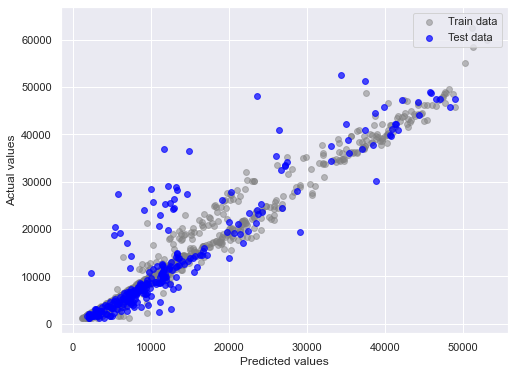

In [100]:
plt.figure(figsize=(8,6))

plt.scatter(y_train_pred,y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred, y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')

# multiple linear regression

In [101]:
#indepentent variabel "X"
X = data_set.drop("charges",axis=1)
#dependent variabel or target variabel "y"
y= data_set["charges"]
#spliting traing and test sets as test data = 20% and traing data = 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [102]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)

# Model Evaluation
#here R2 score is nothing but our model score/acuracy
y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The  model performance for training set:")
print("\n")
print("MSE is ",mean_squared_error(y_train, y_train_pred))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set


rmse_mlr = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
score_mlr= r2_score(y_test, y_test_pred)

print("The model performance for testing set:")
print("\n")
print("MSE is ",mean_squared_error(y_test, y_test_pred))
print('RMSE is {}'.format(rmse_mlr))
print('R2 score is {}'.format(score_mlr))   

The  model performance for training set:


MSE is  35567369.75226154
RMSE is 5963.838508231216
R2 score is 0.7476155702740495


The model performance for testing set:


MSE is  41712723.5595304
RMSE is 6458.538809942262
R2 score is 0.7520487967094092


model score with outliers 

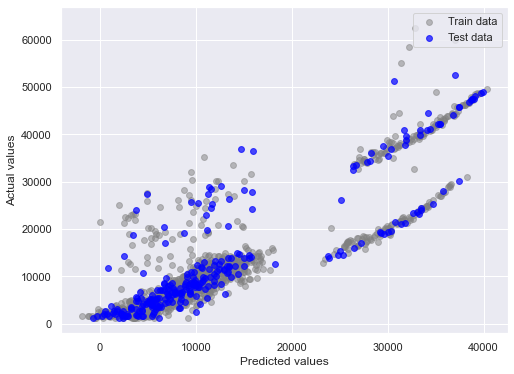

In [103]:
plt.figure(figsize=(8,6))

plt.scatter(y_train_pred,y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred, y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
#plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

<AxesSubplot:xlabel='charges'>

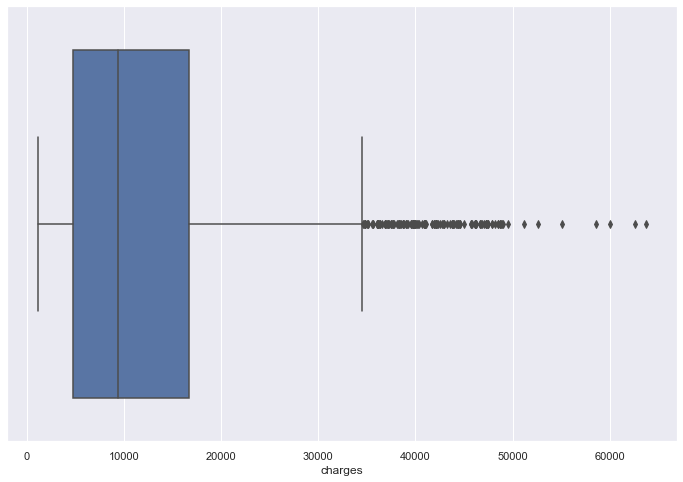

In [104]:
sns.boxplot(x=data_set["charges"])

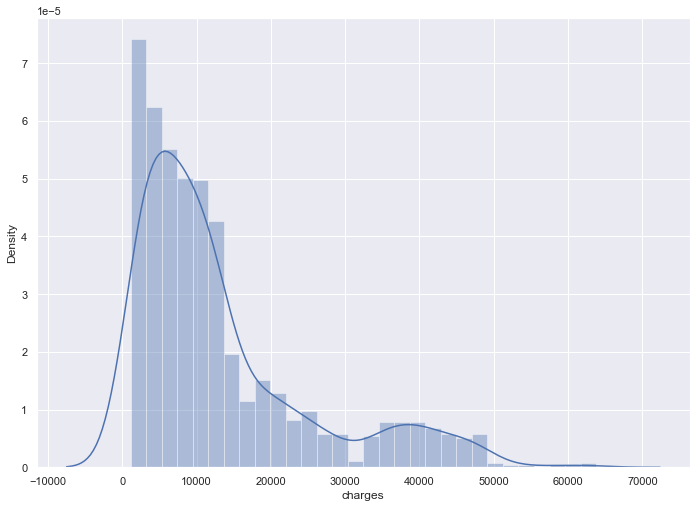

In [105]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_set["charges"], bins=30)
plt.show()

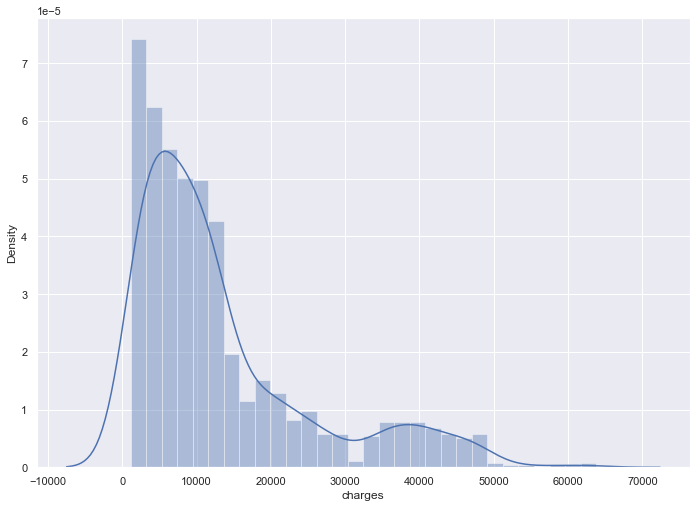

In [106]:
df=data_set.drop(data_set.index[list((np.where( data_set["charges"]>33000)))])
sns.distplot(data_set["charges"], bins=30)
plt.show()

In [107]:
df.shape

(1186, 8)

In [108]:
data_set.shape

(1337, 8)

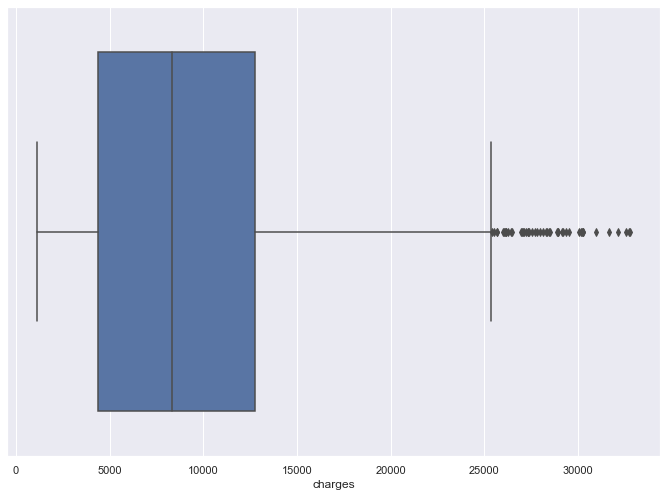

In [109]:
sns.boxplot(x= df["charges"])
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:>

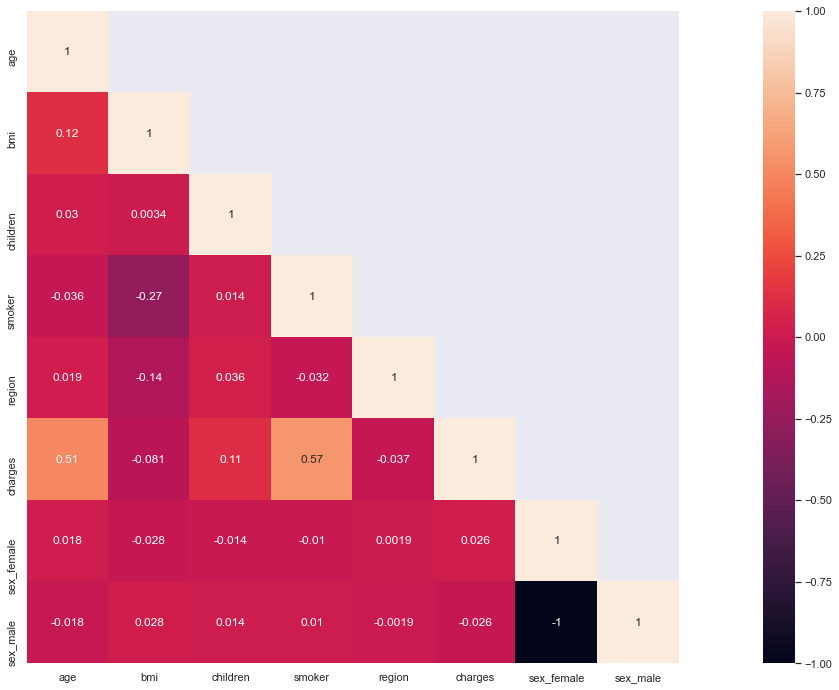

In [110]:
cor_mat=  df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [111]:
df.shape

(1186, 8)

## mlr after outlier detection 

In [112]:
#indepentent variabel "X"
X =  df.drop("charges",axis=1)
#dependent variabel or target variabel "y"
y=  df["charges"]
#spliting traing and test sets as test data = 20% and traing data = 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

mlr = LinearRegression()
mlr.fit(X_train,y_train)

# Model Evaluation
#here R2 score is nothing but our model score/acuracy
y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set:")
print("\n")
print("MSE is ",mean_squared_error(y_train, y_train_pred))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set


rmse_mlr_outlier = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
score_mlr_outlier= r2_score(y_test, y_test_pred)

print("The model performance for testing set:")
print("\n")
print("MSE is ",mean_squared_error(y_test, y_test_pred))
print('RMSE is {}'.format(rmse_mlr_outlier))
print('R2 score is {}'.format(score_mlr_outlier)) 

The model performance for training set:


MSE is  18776078.5105381
RMSE is 4333.137259600497
R2 score is 0.6055963910764193


The model performance for testing set:


MSE is  16066948.15339938
RMSE is 4008.359783427553
R2 score is 0.6402897987210452


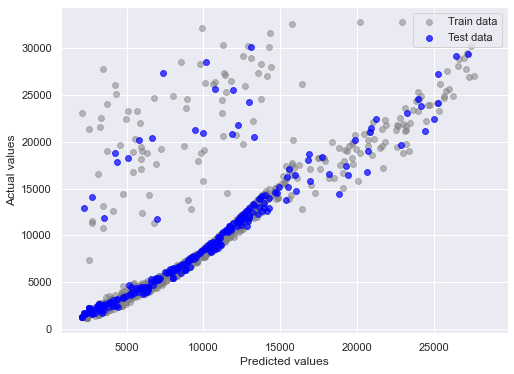

In [113]:
plt.figure(figsize=(8,6))

plt.scatter(y_train_pred,y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred, y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
#plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

### rfr after outlier detection

In [114]:
rfr.fit(X_train,y_train)

# Model Evaluation
#here R2 score is nothing but our model score/acuracy
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set:")
print("\n")
print("MSE is ",mean_squared_error(y_train, y_train_pred))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set


rmse_rfr_outlier = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
score_rfr_outlier= r2_score(y_test, y_test_pred)

print("The model performance for testing set:")
print("\n")
print("MSE is ",mean_squared_error(y_test, y_test_pred))
print('RMSE is {}'.format(rmse_rfr_outlier))
print('R2 score is {}'.format(score_rfr_outlier)) 

The model performance for training set:


MSE is  2999138.892012603
RMSE is 1731.802209264269
R2 score is 0.9370011580421891


The model performance for testing set:


MSE is  19516951.83427837
RMSE is 4417.7994334598725
R2 score is 0.5630503935388262


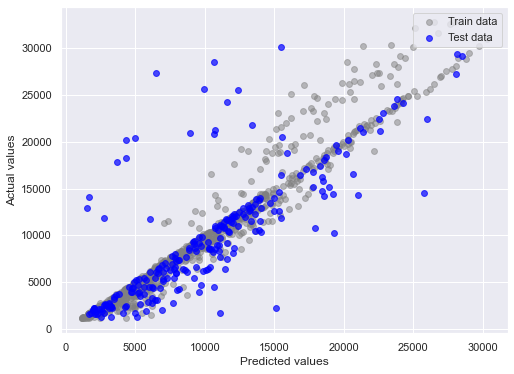

In [115]:
plt.figure(figsize=(8,6))

plt.scatter(y_train_pred,y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred, y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
#plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

# MLR with PCA

In [116]:
# Naming the features
features =   df.drop("charges",axis=1)

# Separating out the features
x =  features.values

# Separating out the target
y =  df["charges"].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [117]:
 df.shape

(1186, 8)

<AxesSubplot:xlabel='PCA count', ylabel='% variance explained'>

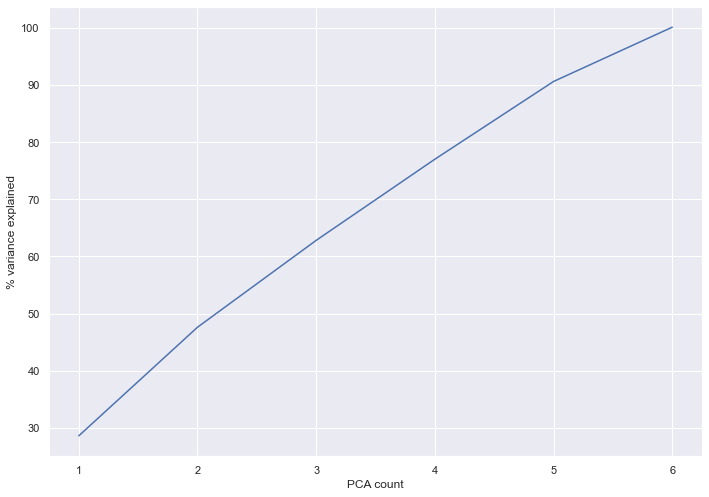

In [118]:
# Determining principal components
pca = PCA(n_components=6)
x = pca.fit_transform(x)
principalDf = pd.DataFrame(data =x
             , columns = ["principal_component1","principal_component2","principal_component3",
                          "principal_component4","principal_component5","principal_component6"])

principal_components = np.arange(1,len(pca.explained_variance_ratio_)+1)
variance_explained = np.cumsum(np.around(pca.explained_variance_ratio_*100,decimals=1))

sns.lineplot(x='PCA count',y='% variance explained',
             data=pd.DataFrame({ 'PCA count': principal_components,
                 '% variance explained':variance_explained}))

In [119]:
# Final DF
finalDf = pd.concat([principalDf, df[["charges"]]], axis = 1)
finalDf.head()

,principal_component1,principal_component2,principal_component3,principal_component4,principal_component5,principal_component6,charges
0,-1.375745,2.696227,-0.564006,-0.470992,-0.354521,2.297656,16884.92400
1,1.503620,-0.434960,-1.580662,0.060053,1.293971,0.025147,1725.55230
2,1.516064,-0.546554,-0.342302,1.246322,1.715527,-0.295138,4449.46200
3,1.385880,0.907471,-0.219964,-1.192957,-0.282156,-0.789537,21984.47061
4,1.424363,0.210183,-0.327183,-1.153346,-0.141053,-0.060607,3866.85520


In [120]:
pca.explained_variance_ratio_

array([0.28606263, 0.18967123, 0.15185364, 0.14188467, 0.13563588,
       0.09489195])

<AxesSubplot:xlabel='principal_component1', ylabel='charges'>

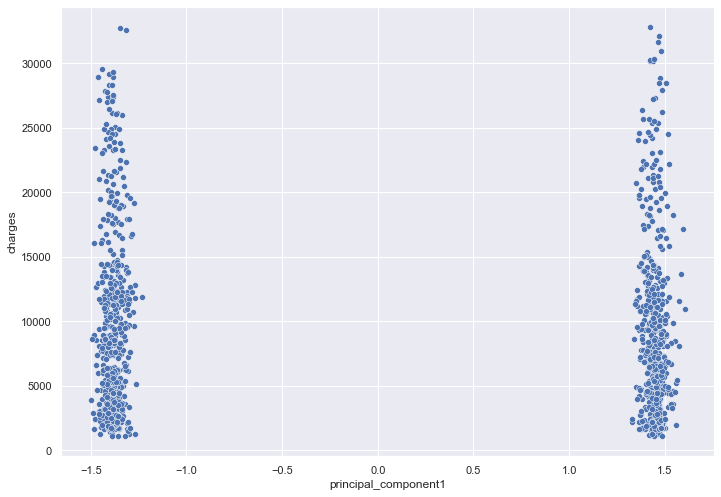

In [121]:
sns.scatterplot(x='principal_component1',y='charges',data=finalDf)

In [122]:
x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)
mlr = LinearRegression()
mlr.fit(x_train,Y_train)

# Model Evaluation
#here R2 score is nothing but our model score/acuracy
Y_train_pred = mlr.predict(x_train)
Y_test_pred = mlr.predict(x_test)

rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_pred)))
r2 = r2_score(Y_train, Y_train_pred)

print("The model performance for training set:")
print("\n")
print("MSE is ",mean_squared_error(Y_train, Y_train_pred))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set


rmse_mlr_pca = (np.sqrt(mean_squared_error(Y_test, Y_test_pred)))
score_mlr_pca= r2_score(Y_test, Y_test_pred)

print("The model performance for testing set:")
print("\n")
print("MSE is ",mean_squared_error(Y_test, Y_test_pred))
print('RMSE is {}'.format(rmse_mlr_pca))
print('R2 score is {}'.format(score_mlr_pca))  

The model performance for training set:


MSE is  18776078.5105381
RMSE is 4333.137259600497
R2 score is 0.6055963910764193


The model performance for testing set:


MSE is  16154345.941507135
RMSE is 4019.246937114854
R2 score is 0.6383331187310792


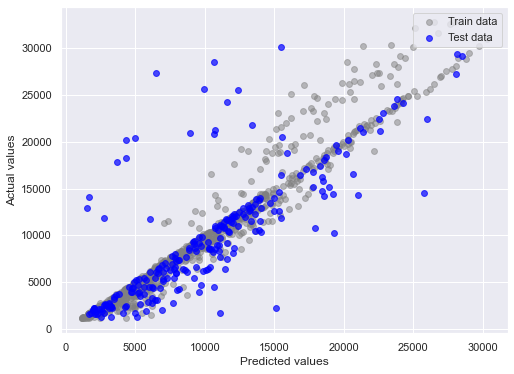

In [123]:
plt.figure(figsize=(8,6))

plt.scatter(y_train_pred,y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred, y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')

## inference on all models

RMSE value using  MLR_before_outlier is: 6458.538809942262
RMSE value using MLR_after_outlier is: 4008.359783427553
RMSE value using RFR_after_outlier is: 4417.7994334598725
RMSE value using MLR with PCA is: 4019.246937114854
RMSE value using RFR is: 5205.421535502027
RMSE value using RFR_hyper_parameter is: 5007.8063674153855
RMSE value using RFR with PCA is: 5571.192198836115


<AxesSubplot:title={'center':'RMSE for diffternt models'}, xlabel='Algorithms', ylabel='RMSE value'>

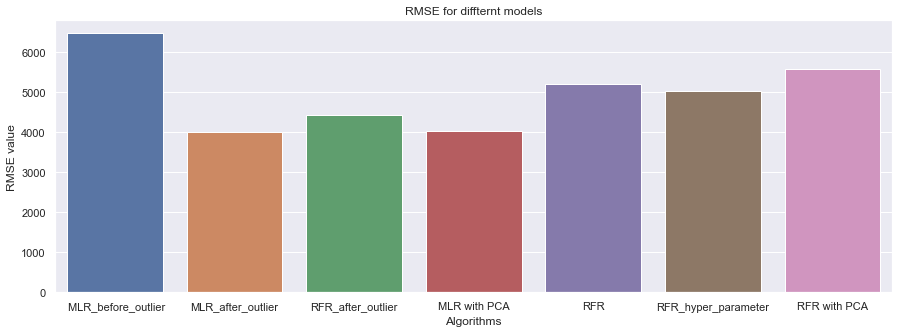

In [124]:
RMSE = [rmse_mlr, rmse_mlr_outlier,rmse_rfr_outlier,rmse_mlr_pca, rmse_rfr, rmse_rfr_hp,rmse_rfr_pca]
algorithms = [" MLR_before_outlier","MLR_after_outlier","RFR_after_outlier","MLR with PCA","RFR","RFR_hyper_parameter","RFR with PCA"]    

for i in range(len(algorithms)):
    print("RMSE value using "+algorithms[i]+" is: "+str(RMSE[i])+"") 
sns.set(rc={'figure.figsize':(15,5)})
plt.xlabel("Algorithms")
plt.ylabel("RMSE value")
plt.title("RMSE for diffternt models")
sns.barplot(algorithms,RMSE)

The accuracy score achieved using  MLR_before_outlier is: 0.7520487967094092
The accuracy score achieved using MLR_after_outlier is: 0.6402897987210452
The accuracy score achieved using RFR_after_outlier is: 0.5630503935388262
The accuracy score achieved using MLR with PCA is: 0.6383331187310792
The accuracy score achieved using RFR is: 0.8389319199345683
The accuracy score achieved using RFR_hyper_parameter is: 0.8509291495837972
The accuracy score achieved using RFR with PCA is: 0.8155010259182858


<AxesSubplot:title={'center':'model scores'}, xlabel='Algorithms', ylabel='Accuracy score'>

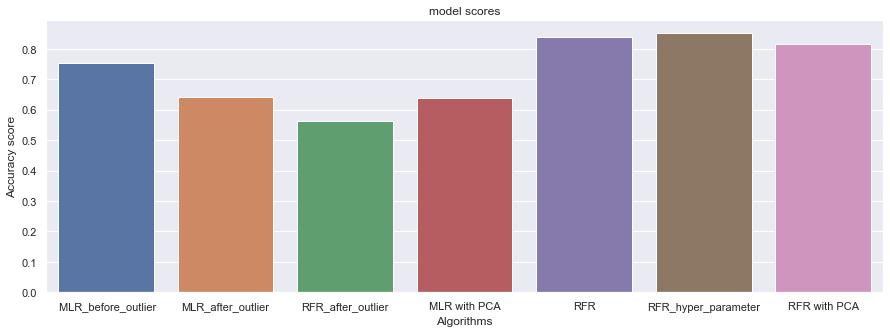

In [125]:
scores = [score_mlr,score_mlr_outlier,score_rfr_outlier,score_mlr_pca,score_rfr,score_rfr_hp,score_rfr_pca]
algorithms = [" MLR_before_outlier","MLR_after_outlier","RFR_after_outlier","MLR with PCA","RFR","RFR_hyper_parameter","RFR with PCA"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+"") 
sns.set(rc={'figure.figsize':(15,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title("model scores")
sns.barplot(algorithms,scores)

## After comparing 7 model scores
## Random forest regressor model(using hyper parameter tuning )is good because its having high accuracy and less RMSE
## MODEL SCORE IS 85.09%